WARNING: It plays but the results correspond to the first sequence in a way

[Qibo 0.1.8|INFO|2022-12-08 14:54:05]: WARNING: The frequency of pulse ReadoutPulse(400, 200, 0.9, 7_520_000_000, 0, Rectangular(), 1, 0) is higher than the nyqusit frequency (1000000000) for the device sampling rate: 2000000000
[Qibo 0.1.8|INFO|2022-12-08 14:54:05]: WARNING: The frequency of pulse ReadoutPulse(400, 200, 0.9, 7_520_000_000, 0, Rectangular(), 1, 0) is higher than the nyqusit frequency (1000000000) for the device sampling rate: 2000000000


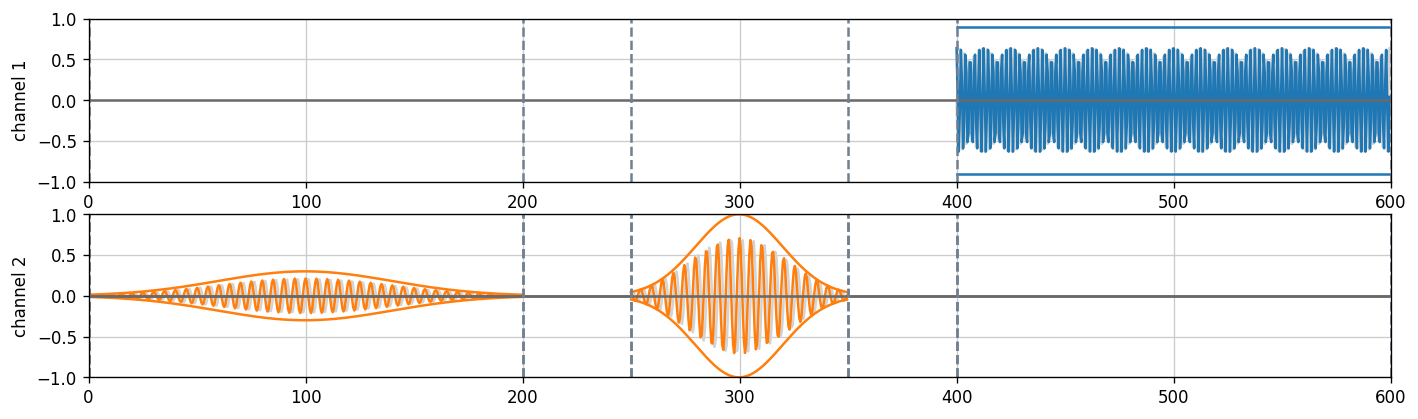

[Qibo 0.1.8|INFO|2022-12-08 14:54:05]: WARNING: The frequency of pulse ReadoutPulse(400, 200, 0.2, 7_520_000_000, 0, Rectangular(), 1, 0) is higher than the nyqusit frequency (1000000000) for the device sampling rate: 2000000000
[Qibo 0.1.8|INFO|2022-12-08 14:54:05]: WARNING: The frequency of pulse ReadoutPulse(400, 200, 0.2, 7_520_000_000, 0, Rectangular(), 1, 0) is higher than the nyqusit frequency (1000000000) for the device sampling rate: 2000000000


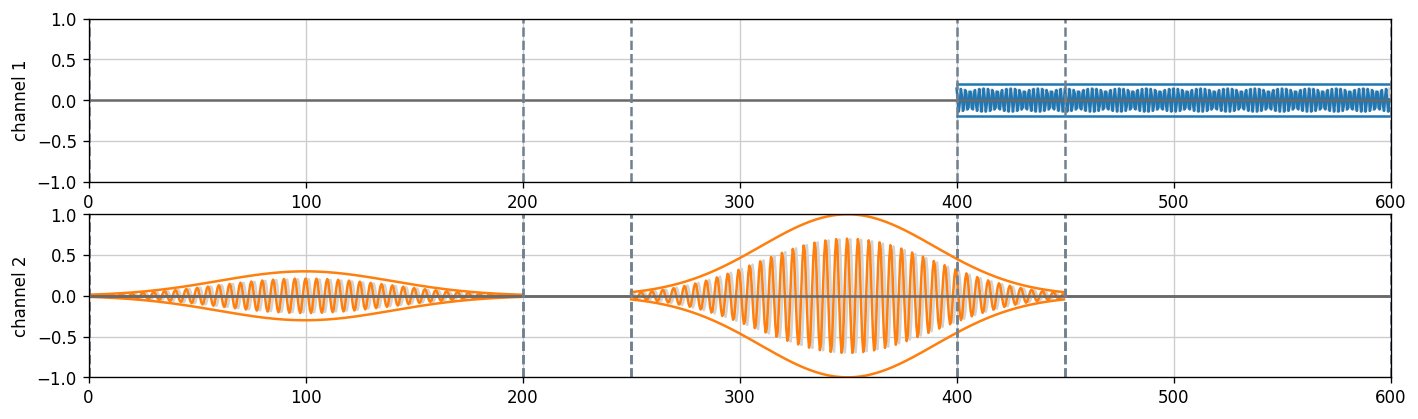

In [15]:
from qibolab.pulses import Pulse, PulseSequence, ReadoutPulse, PulseShape
from qibolab.instruments.zhinst import SHFQC_QA
import laboneq.simple as lo
from qibolab.paths import qibolab_folder

PulseShape.SAMPLING_RATE = 2e9

sequences = []

sequence1 = PulseSequence()

sequence1.add(
    Pulse(
        start=0,
        amplitude=0.3,
        duration=200,
        frequency=200_000_000,
        relative_phase=0,
        shape="Gaussian(5)",  # Gaussian shape with std = duration / int
        channel=2,
        qubit=0,
    )
)

sequence1.add(
    Pulse(
        start=250,
        amplitude=1,
        duration=100,
        frequency=200_000_000,
        relative_phase=0,
        shape="Drag(5, 10)", 
        channel=2,
        qubit=0,
    )
)

sequence1.add(
    ReadoutPulse(
        start=400,
        amplitude=0.9,
        duration=200,
        frequency=7_520_000_000,
        relative_phase=0,
        shape="Rectangular",
        channel=1,
        qubit=0,
    )
)


sequence1.plot()

sequences.append(sequence1)

sequence2 = PulseSequence()

sequence2.add(
    Pulse(
        start=0,
        amplitude=0.3,
        duration=200,
        frequency=200_000_000,
        relative_phase=0,
        shape="Gaussian(5)",  # Gaussian shape with std = duration / int
        channel=2,
        qubit=0,
    )
)

sequence2.add(
    Pulse(
        start=250,
        amplitude=1,
        duration=200,
        frequency=200_000_000,
        relative_phase=0.5,
        shape="Drag(5, 0.1)", 
        channel=2,
        qubit=0,
    )
)

sequence2.add(
    ReadoutPulse(
        start=400,
        amplitude=0.2,
        duration=200,
        frequency=7_520_000_000,
        relative_phase=0,
        shape="Rectangular",
        channel=1,
        qubit=0,
    )
)


sequence2.plot()

sequences.append(sequence2)

In [16]:
from qibolab.pulses import Pulse, PulseSequence, ReadoutPulse, PulseShape
from qibolab.instruments.zhinst import SHFQC_QA
import laboneq.simple as lo
from qibolab.paths import qibolab_folder

# runcard = "/home/admin/Juan/qibolab/src/qibolab/runcards/zhinst.yml"
runcard = qibolab_folder / "runcards" / "zhinst.yml"
use_emulation = False
Device = SHFQC_QA('EL_ZURO', "DEV12146", runcard, use_emulation=use_emulation)

2022.12.08 14:54:06.304 laboneq.controller.laboneq_logging INFO   Logging initialized from [Default inline config in laboneq.controller.laboneq_logging] logdir is /home/admin/Juan/qibolab/examples/laboneq_output/log
2022.12.08 14:54:06.305 laboneq.controller.controller  INFO   VERSION: laboneq 1.4.0
2022.12.08 14:54:06.305 laboneq.controller.devices.device_collection INFO   Connecting to data server at localhost:8004
2022.12.08 14:54:06.448 laboneq.controller.communication INFO   Connected to Zurich Instrument's Data Server version 22.08 at localhost:8004
2022.12.08 14:54:06.979 laboneq.controller.devices.device_collection INFO   Configuring clock sources
2022.12.08 14:54:07.121 laboneq.controller.devices.device_collection INFO   Clock sources configured


In [17]:
sequences

[PulseSequence
 ReadoutPulse(400, 200, 0.9, 7_520_000_000, 0, Rectangular(), 1, 0)
 Pulse(0, 200, 0.3, 200_000_000, 0, Gaussian(5), 2, PulseType.DRIVE, 0)
 Pulse(250, 100, 1, 200_000_000, 0, Drag(5, 10), 2, PulseType.DRIVE, 0),
 PulseSequence
 ReadoutPulse(400, 200, 0.2, 7_520_000_000, 0, Rectangular(), 1, 0)
 Pulse(0, 200, 0.3, 200_000_000, 0, Gaussian(5), 2, PulseType.DRIVE, 0)
 Pulse(250, 200, 1, 200_000_000, 0.5, Drag(5, 0.1), 2, PulseType.DRIVE, 0)]

In [18]:
Device.sequences_to_ZurichPulses(sequences)

In [19]:
Device.sequence_readout

[[PulseFunctional(function='const', uid='readout_0_0', amplitude=0.9, length=2.0000000000000002e-07, pulse_parameters=None)],
 [PulseFunctional(function='const', uid='readout_1_0', amplitude=0.2, length=2.0000000000000002e-07, pulse_parameters=None)]]

In [20]:
Device.sequencesPulses_to_exp()

In [21]:
Device.experiment.get_signal_map()

{'drive': '/logical_signal_groups/q0/drive_line',
 'measure': '/logical_signal_groups/q0/measure_line',
 'acquire': '/logical_signal_groups/q0/acquire_line'}

In [22]:
Device.run_seq()

2022.12.08 14:54:08.920 laboneq.compiler.workflow.compiler INFO   Starting LabOne Q Compiler run...
2022.12.08 14:54:08.949 laboneq.compiler.workflow.compiler INFO   Total seqC lines generated: 37
2022.12.08 14:54:08.950 laboneq.compiler.workflow.compiler INFO   Total sample points generated: 6144
2022.12.08 14:54:08.950 laboneq.compiler.workflow.compiler INFO   Finished LabOne Q Compiler run.
2022.12.08 14:54:09.859 laboneq.controller.controller  INFO   Starting near-time execution...
2022.12.08 14:54:10.413 laboneq.controller.controller  INFO   Finished near-time execution.


In [23]:
Device.sequence_readout

[[PulseFunctional(function='const', uid='readout_0_0', amplitude=0.9, length=2.0000000000000002e-07, pulse_parameters=None)],
 [PulseFunctional(function='const', uid='readout_1_0', amplitude=0.2, length=2.0000000000000002e-07, pulse_parameters=None)]]

In [24]:
Device.results.get_data("sequence0")

(7.437983151586991e-06+4.0466567365542116e-05j)

In [25]:
Device.results.get_data("sequence1")

(2.809075705319827e-05+2.9369494160023064e-05j)

In [27]:
Device.delays

[[-200, 50], [-200, 50]]

In [29]:
Device.rel_phases

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.5]]

In [31]:
msr,phase, i , q = Device.execute_pulse_sequences(sequences)
print(msr, phase, i, q)

2022.12.08 14:54:37.021 laboneq.compiler.workflow.compiler INFO   Starting LabOne Q Compiler run...
2022.12.08 14:54:37.052 laboneq.compiler.workflow.compiler INFO   Total seqC lines generated: 37
2022.12.08 14:54:37.052 laboneq.compiler.workflow.compiler INFO   Total sample points generated: 6144
2022.12.08 14:54:37.052 laboneq.compiler.workflow.compiler INFO   Finished LabOne Q Compiler run.
2022.12.08 14:54:37.820 laboneq.controller.controller  INFO   Starting near-time execution...
2022.12.08 14:54:38.408 laboneq.controller.controller  INFO   Finished near-time execution.
[3.3186227246171625e-05, 3.4107541591496535e-05] [1.1913686620978827, 0.9542194418378462] [1.2291810242547284e-05, 1.9722541384027464e-05] [3.082591571706757e-05, 2.7827068741981972e-05]
